In [1]:
import sys
sys.path


['/home/mnt/nzh/nzhanglab/project/shuang/scATAC/comparison_methods/scglue',
 '/usr/local/python-3.8.5/lib/python38.zip',
 '/usr/local/python-3.8.5/lib/python3.8',
 '/usr/local/python-3.8.5/lib/python3.8/lib-dynload',
 '',
 '/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages',
 '/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/stereoscope-0.3.1-py3.8.egg']

In [2]:
sys.path.append('/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages')



In [3]:
import anndata
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [4]:
rna = anndata.read_h5ad("e18mouse/e18mouse_RNA_v2.h5ad")
rna


AnnData object with n_obs × n_vars = 3981 × 14476
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'domain'
    var: 'features'

In [5]:
atac = anndata.read_h5ad("e18mouse/e18mouse_ATAC_v2.h5ad")
atac

AnnData object with n_obs × n_vars = 3981 × 139083
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'domain'
    var: 'features'

In [6]:
rna.obs_names
atac.obs_names


Index(['AAACAGCCAACCGCCA-1', 'AAACAGCCAAGGTCGA-1', 'AAACAGCCATCAGCAC-1',
       'AAACAGCCATGGTTAT-1', 'AAACATGCACTTACAG-1', 'AAACCAACAACTGGGA-1',
       'AAACCAACATCGTTCT-1', 'AAACCGAAGCTACTGG-1', 'AAACCGCGTCACCAAA-1',
       'AAACCGCGTGCAATGC-1',
       ...
       'TTTGTGAAGCTGGAAA-1', 'TTTGTGAAGGTTAGCT-1', 'TTTGTGAAGTCGCTAG-1',
       'TTTGTGGCACTCAACA-1', 'TTTGTGGCATAATCGT-1', 'TTTGTGGCATTTGCTC-1',
       'TTTGTGTTCAATGACC-1', 'TTTGTTGGTAGACAAA-1', 'TTTGTTGGTGGAGCAA-1',
       'TTTGTTGGTTAGAGCC-1'],
      dtype='object', length=3981)

In [7]:
rna.X, rna.X.data


(<3981x14476 sparse matrix of type '<class 'numpy.float64'>'
 	with 11666793 stored elements in Compressed Sparse Row format>,
 array([1., 4., 2., ..., 9., 1., 1.]))

In [8]:
rna.layers["counts"] = rna.X.copy()


In [9]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")


In [10]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'domain' as categorical


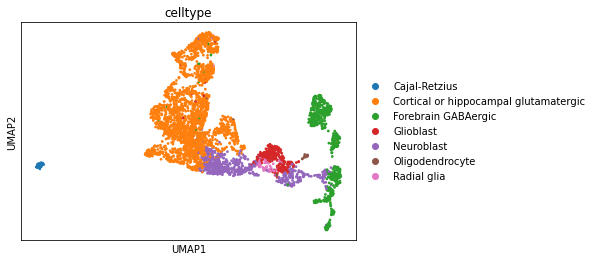

In [11]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="celltype")


In [12]:
atac.X, atac.X.data


(<3981x139083 sparse matrix of type '<class 'numpy.float64'>'
 	with 34011574 stored elements in Compressed Sparse Row format>,
 array([1., 4., 2., ..., 2., 1., 2.]))

In [13]:
scglue.data.lsi(atac, n_components=100, n_iter=15)


/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [14]:
sc.pp.neighbors(atac, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac)

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'domain' as categorical


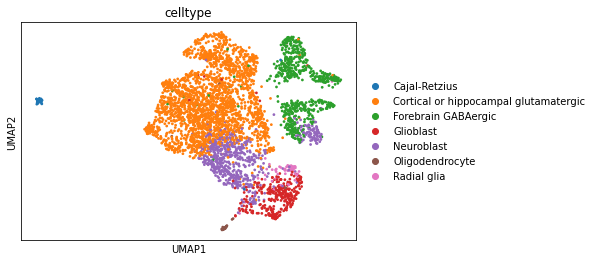

In [15]:
sc.pl.umap(atac, color="celltype")


In [16]:
rna.var.head()


,features,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
Lypla1,Lypla1,False,NaN,0.245416,0.418399,1.172865,0.135644,0.337979
Tcea1,Tcea1,False,NaN,1.002010,1.873363,0.900295,0.476260,0.522940
Atp6v1h,Atp6v1h,False,NaN,0.913841,1.497851,0.819683,0.435396,0.491296
Oprk1,Oprk1,True,901.0,0.003266,0.007276,1.835794,0.002528,0.057611
Rb1cc1,Rb1cc1,False,NaN,1.575735,2.769954,0.667255,0.714725,0.585666


In [17]:
rna.var_names.name = 'genes'

In [18]:
rna.var_names

Index(['Lypla1', 'Tcea1', 'Atp6v1h', 'Oprk1', 'Rb1cc1', 'St18', 'Pcmtd1',
       'Rrs1', 'Adhfe1', 'Sgk3',
       ...
       'Hspa12a', 'Vax1', 'Pdzd8', 'Rab11fip2', 'Fam204a', 'Cacul1', 'Eif3a',
       'Sfxn4', 'Prdx3', 'Csf2ra'],
      dtype='object', name='genes', length=14476)

In [19]:
scglue.data.get_gene_annotation(
    rna, gtf="gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz",
    gtf_by="gene_name"
)
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
genes,,,
Lypla1,chr1,4807787.0,4848410.0
Tcea1,chr1,4857813.0,4897909.0
Atp6v1h,chr1,5070017.0,5162529.0
Oprk1,chr1,5588465.0,5606131.0
Rb1cc1,chr1,6206196.0,6276648.0


In [20]:
#rna.var

In [21]:
df = rna.var
print(df.dropna(subset=['chrom'])["features"])

genes
Lypla1      Lypla1
Tcea1        Tcea1
Atp6v1h    Atp6v1h
Oprk1        Oprk1
Rb1cc1      Rb1cc1
            ...   
Cacul1      Cacul1
Eif3a        Eif3a
Sfxn4        Sfxn4
Prdx3        Prdx3
Csf2ra      Csf2ra
Name: features, Length: 14361, dtype: object


In [22]:
rna2 = rna
rna2 = rna2[:,df.dropna(subset=['chrom'])["features"]]

In [23]:
#rna2.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

In [24]:
rna2.var_names

Index(['Lypla1', 'Tcea1', 'Atp6v1h', 'Oprk1', 'Rb1cc1', 'St18', 'Pcmtd1',
       'Rrs1', 'Adhfe1', 'Sgk3',
       ...
       'Hspa12a', 'Vax1', 'Pdzd8', 'Rab11fip2', 'Fam204a', 'Cacul1', 'Eif3a',
       'Sfxn4', 'Prdx3', 'Csf2ra'],
      dtype='object', name='genes', length=14361)

In [25]:
#rna2.var.loc[:, ["chrom", "chromStart", "chromEnd"]].to_csv('e18mouse/rnavar2.csv',index=False)

In [26]:
atac.var_names[:5]


Index(['chr1-3094399-3095523', 'chr1-3113503-3114077', 'chr1-3119414-3121804',
       'chr1-3181343-3181401', 'chr1-3198296-3198611'],
      dtype='object')

In [27]:
split = atac.var_names.str.split(r"[:-]")
atac.var["chrom"] = split.map(lambda x: x[0])
atac.var["chromStart"] = split.map(lambda x: x[1])
atac.var["chromEnd"] = split.map(lambda x: x[2])
atac.var.head()

,features,chrom,chromStart,chromEnd
chr1-3094399-3095523,chr1-3094399-3095523,chr1,3094399,3095523
chr1-3113503-3114077,chr1-3113503-3114077,chr1,3113503,3114077
chr1-3119414-3121804,chr1-3119414-3121804,chr1,3119414,3121804
chr1-3181343-3181401,chr1-3181343-3181401,chr1,3181343,3181401
chr1-3198296-3198611,chr1-3198296-3198611,chr1,3198296,3198611


In [28]:
graph = scglue.genomics.rna_anchored_prior_graph(rna2, atac)
graph

  0%|          | 0/14361 [00:00<?, ?it/s]

In [29]:
graph.number_of_nodes(), graph.number_of_edges()


(153444, 305928)

In [30]:
# Graph node covers all omic features
all(graph.has_node(gene) for gene in rna2.var_names), \
all(graph.has_node(peak) for peak in atac.var_names)

(True, True)

In [31]:
# Edge attributes contain weights and signs
for _, e in zip(range(5), graph.edges):
    print(f"{e}: {graph.edges[e]}")

('Xkr4', 'chr1-3210204-3210605', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('Xkr4', 'chr1-3292586-3292976', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('Xkr4', 'chr1-3371598-3371961', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('Xkr4', 'chr1-3399683-3400422', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('Xkr4', 'chr1-3406113-3406524', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}


In [32]:
# Each node has a self-loop
all(graph.has_edge(gene, gene) for gene in rna2.var_names), \
all(graph.has_edge(peak, peak) for peak in atac.var_names)


(True, True)

In [33]:
# Graph is symmetric
all(graph.has_edge(j, i) for i, j, _ in graph.edges)


True

In [34]:
atac.var.head()


,features,chrom,chromStart,chromEnd,highly_variable
chr1-3094399-3095523,chr1-3094399-3095523,chr1,3094399,3095523,False
chr1-3113503-3114077,chr1-3113503-3114077,chr1,3113503,3114077,False
chr1-3119414-3121804,chr1-3119414-3121804,chr1,3119414,3121804,False
chr1-3181343-3181401,chr1-3181343-3181401,chr1,3181343,3181401,False
chr1-3198296-3198611,chr1-3198296-3198611,chr1,3198296,3198611,False


In [35]:
rna = rna2

In [36]:
rna.var

,features,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,chrom,chromStart,...,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,gene_id,gene_type,mgi_id,havana_gene,tag
genes,,,,,,,,,,,,,,,,,,,,,
Lypla1,Lypla1,False,NaN,0.245416,0.418399,1.172865,0.135644,0.337979,chr1,4807787.0,...,.,.,.,.,.,ENSMUSG00000025903.14,protein_coding,MGI:1344588,OTTMUSG00000021562.4,overlapping_locus
Tcea1,Tcea1,False,NaN,1.002010,1.873363,0.900295,0.476260,0.522940,chr1,4857813.0,...,.,.,.,.,.,ENSMUSG00000033813.15,protein_coding,MGI:1196624,OTTMUSG00000042348.1,overlapping_locus
Atp6v1h,Atp6v1h,False,NaN,0.913841,1.497851,0.819683,0.435396,0.491296,chr1,5070017.0,...,.,.,.,.,.,ENSMUSG00000033793.12,protein_coding,MGI:1914864,OTTMUSG00000050145.9,NaN
Oprk1,Oprk1,True,901.0,0.003266,0.007276,1.835794,0.002528,0.057611,chr1,5588465.0,...,.,.,.,.,.,ENSMUSG00000025905.14,protein_coding,MGI:97439,OTTMUSG00000034734.3,NaN
Rb1cc1,Rb1cc1,False,NaN,1.575735,2.769954,0.667255,0.714725,0.585666,chr1,6206196.0,...,.,.,.,.,.,ENSMUSG00000025907.14,protein_coding,MGI:1341850,OTTMUSG00000033467.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cacul1,Cacul1,False,NaN,0.576488,0.829136,0.829105,0.303080,0.439624,chr19,60524695.0,...,.,.,.,.,.,ENSMUSG00000033417.16,protein_coding,MGI:1926082,OTTMUSG00000074395.1,NaN
Eif3a,Eif3a,False,NaN,1.966591,5.373507,0.888643,0.770264,0.592823,chr19,60761116.0,...,.,.,.,.,.,ENSMUSG00000024991.8,protein_coding,MGI:95301,OTTMUSG00000074398.1,ncRNA_host
Sfxn4,Sfxn4,False,NaN,0.079628,0.101949,0.912049,0.047325,0.190649,chr19,60837276.0,...,.,.,.,.,.,ENSMUSG00000063698.9,protein_coding,MGI:2137680,OTTMUSG00000021213.2,NaN


In [37]:
rna2.raw = None

In [38]:
import anndata
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [39]:
rna2.write("e18mouse/rna_preprocessed_v2.h5ad", compression="gzip")


/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'chrom' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'score' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. 

In [40]:
#rna.write("e18mouse/rna_preprocessed.h5ad", compression="gzip")
atac.raw = None
atac.write("e18mouse/atac_preprocessed_v2.h5ad", compression="gzip")
nx.write_graphml(graph, "e18mouse/prior_v2.graphml.gz")

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'chrom' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'chromStart' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future vers